<a href="https://colab.research.google.com/github/audalsgh/20250704/blob/main/0704_python_matplotlib_%ED%95%A8%EC%88%98%EC%98%88%EC%A0%9C5%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1번과 2번을 해결했으면, 이 두문제를 하나의 코드로 합쳐보는 확장도 해보면 좋다.

🎯 Mission1: 기본 플롯 만들기<br>
조건:
- Import: import matplotlib.pyplot as plt
- 함수 정의: def setup_basic_plot(step_num=1, action="forward"):
- 캔버스 크기: figsize=(10, 8)<br>

축 범위:
- X축: -1부터 8까지
- Y축: -1부터 12까지
- 글자 크기: 라벨과 제목에 fontsize=12 사용
- 레이아웃 최적화: plt.tight_layout() (show() 직전에)
- 실행: if __name__ == "__main__": 안에서 setup_basic_plot(5, "turn_left") 호출<br>

추가 힌트:
- 함수는 ax 객체를 반환해야 함
- plt.show()로 화면에 표시
- f-string 사용해서 동적 제목 만들기

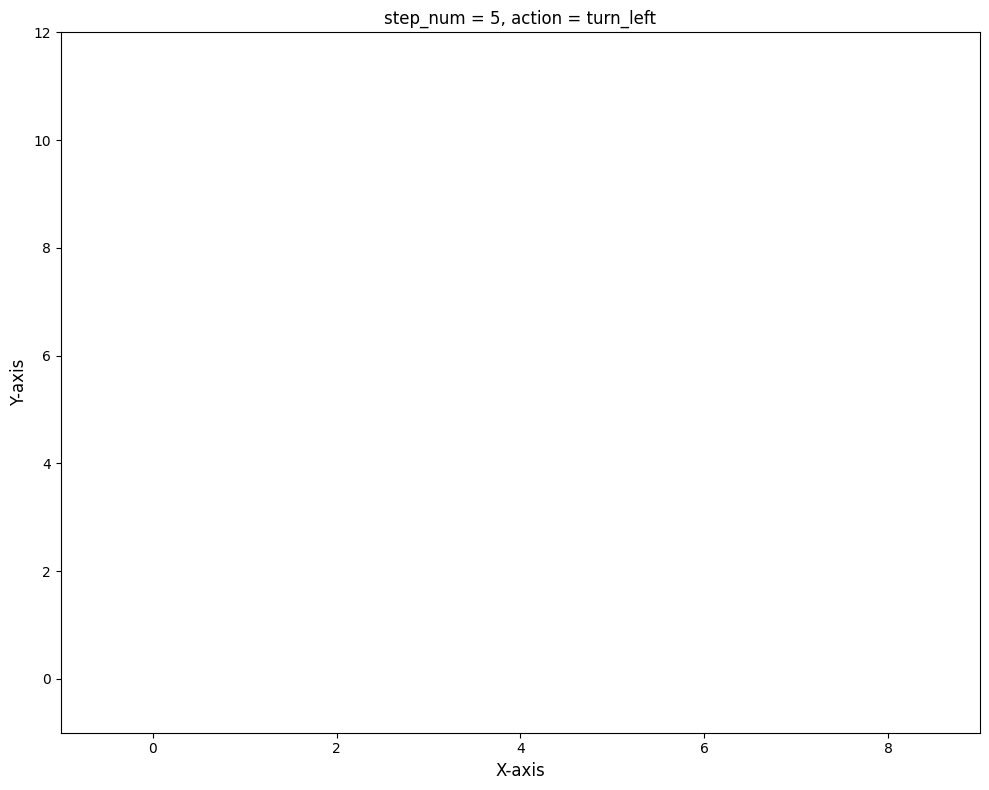

In [25]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
  x = [-1, 9] # 주어진 x,y범위
  y = [-1, 12]

  plt.figure(figsize = (10,8))  # 가로 10인치 세로 8인치 크기의 캔버스를 만들고, 이후 plt.subplot, plt.plot 같은 호출은 이 Figure 위에서 이뤄짐.
  ax = plt.subplot(1,1,1) # 1행 1열중 1번째를 사용하는 Axes 객체를 만듬.

  ax.set_xlim(x)  # ax.plot(x,y) 하는게 아니라, 그래프 없이 x축 y축 범위만 지정해주는 메소드
  ax.set_ylim(y)

  ax.set_title(f'step_num = {step_num}, action = {action}',fontsize =12)  # Axes 객체 안에는 메소드 이름이 set_title() 로 다르다.
  ax.set_xlabel('X-axis', fontsize =12)
  ax.set_ylabel('Y-axis', fontsize =12)

  return ax

if __name__ == "__main__":
  setup_basic_plot(5, "turn_left")
  plt.tight_layout()
  plt.show()

🎯 Mission2: 목표선 그리기 함수 만들기<br>
조건:
- Import: import matplotlib.pyplot as plt
- 함수 정의: def draw_goal_line(obstacles):
- 매개변수: obstacles (장애물들의 집합/리스트)

캔버스 설정:
- 크기: figsize=(8, 6)
- 축 범위: X(-18), Y(-112)
- 격자: grid(True, alpha=0.3)

목표선 계산:
- 가장 높은 장애물의 Y좌표 찾기
- 목표선 = 최대 Y좌표 + 3
- 장애물이 없으면 Y=0 기준

목표선 그리기:
- 초록색 수평선 (color='lime')
- 선 두께: linewidth=3
- 투명도: alpha=0.7

텍스트 표시:
- 위치: (7, goal_y + 0.2)
- 내용: f-string으로 "GOAL (y={goal_y})" 표시
- 색상: 초록색

완성 요소:
- 범례 표시 (ax.legend())
- 레이아웃 최적화
- 화면 출력
- goal_y 값 반환

실행:
- obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용
- 함수 호출해서 결과 확인

힌트:
- ax.axhline(): 수평선 그리기
- max() 함수와 조건부 표현식 활용
- ax.text()의 ha, va 매개변수 사용

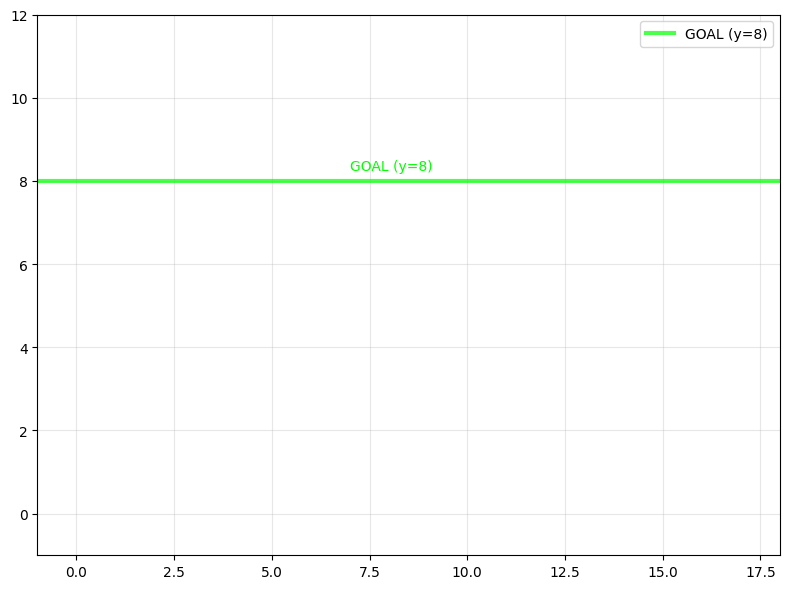

In [26]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
  x = [-1, 18]  # 주어진 x,y범위
  y = [-1, 12]

  plt.figure(figsize=(8,6))  # 캔버스 사이즈를 정의하면 plt.subplot(), plt.plot()의 그림은 이 캔버스에 그려진다.
  ax = plt.subplot(1,1,1)  #1행 1열중 첫번째 차원 위치를 사용할것.

  ax.set_xlim(x)  # Axes 객체가 그려질때, x,y범위를 정해준것.
  ax.set_ylim(y)
  ax.grid(True, alpha=0.3)

  if obstacles:
    yval = [y for (_, y) in obstacles]  # 주어진 조건은 y값만 따와도 충분하므로, [y for (_, y) in obstacles] 리스트안에서 for문을 돌린다.
    goal_y = max(yval) + 3
  else:
    goal_y = 3

  ax.axhline(goal_y, color='lime',lw=3, alpha=0.7,label=f'GOAL (y={goal_y})')  # 가로 수평선을 그리는 메소드로, y축을 위치 인자로 먼저 줬다. label을 붙혀야 legend사용이 되서 그냥 붙힌것.
  ax.text(7, goal_y+0.2, f"GOAL (y={goal_y})", color='lime', ha='left',va='bottom')  # 수평선의 보충설명을 위해 추가한 텍스트
  ax.legend()

  return goal_y

if __name__ == "__main__":
  obstacles = { (3,2),(3,3),(2,4),(4,5) }
  draw_goal_line(obstacles)
  plt.tight_layout()
  plt.show()

🎯 Mission3: 장애물 그리기 함수 만들기<br>
조건:
- Import : import matplotlib.pyplot as plt
- from matplotlib.patches import Rectangle
- 함수 정의: def draw_obstacles(obstacles):
- 매개변수: obstacles (장애물 위치들의 set 또는 list)

캔버스 설정:
- 크기: figsize=(8, 6)
- 축 범위:<br>
    ax.set_xlim(-1, 8)   # X축 범위: -1 ~ 8<br>
    ax.set_ylim(-1, 12)  # Y축 범위: -1 ~ 12
- 정사각형 비율: set_aspect('equal')

격자와 라벨 설정:
- 데이터 처리: set을 list로 변환하여 순서 보장, isinstance() 함수로 타입 확인

장애물 그리기:
- 빨간색 사각형 (color='red', alpha=0.7)
- 크기: 0.8 x 0.8
- 중심 좌표에서 0.4씩 빼서 위치 조정
- Rectangle 패치 사용

텍스트 표시:
- 각 장애물 중앙에 번호 (흰색, 굵은 글씨)
- enumerate() 함수로 번호 매기기

완성 요소:
- 범례 표시 (첫 번째 장애물에만 라벨)
- 콘솔에 정보 출력
- 레이아웃 최적화

실행:
- obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용

핵심 힌트:
- Rectangle((x-0.4, y-0.4), 0.8, 0.8): 사각형 생성
- ax.add_patch(rect): 사각형을 그래프에 추가
- enumerate(): 인덱스와 값을 동시에 가져오기
- isinstance(obstacles, set): 타입 확인

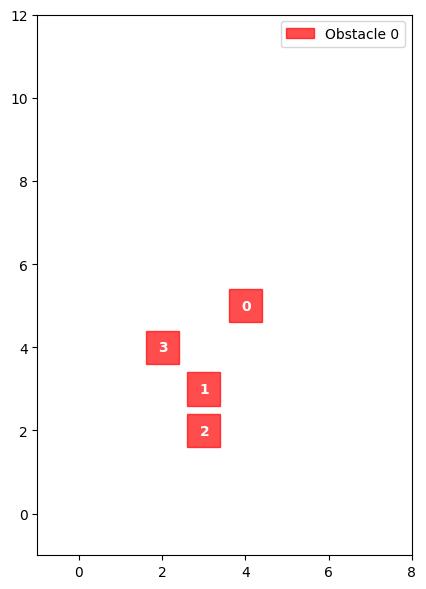

In [62]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
  plt.figure(figsize=(8,6))
  ax = plt.subplot(1,1,1)

  ax.set_xlim(-1, 8)
  ax.set_ylim(-1, 12)
  ax.set_aspect('equal')

  for i, (x, y) in enumerate(obstacles):  # enumerate()함수로 장애물 인덱스와, 좌표 튜플을 가져온다
    if not isinstance(obstacles, set):
      print("obstacles는 세트여야합니다.")

    label = f"Obstacle {i}" if i == 0 else None  # legend()를 위해 label을 미리 정의한다. 첫번째 장애물만 legend()를 갖도록함.
    rect = Rectangle((x-0.4, y-0.4), 0.8, 0.8, color='red', alpha=0.7, label=label)  # 주어진 색상으로 장애물을 사각형으로 그려냄.
    ax.add_patch(rect)
    ax.text(x-0.1, y-0.1, i, color='white', weight='bold', size=10)  # 인덱스를 가져온 이유는 여기서 장애물 번호를 메기기때문.
    ax.legend()

if __name__ =="__main__":
  obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
  draw_obstacles(obstacles)
  plt.tight_layout()
  plt.show()

🎯 Mission4: 이동 경로 그리기 함수 만들기<br>
조건:
1. Import 설정:<br>
import matplotlib.pyplot as plt

2. 함수 정의:<br>
def draw_path(path):<br>
매개변수: path (이동 경로 좌표들의 리스트)

3. 캔버스 설정:<br>
크기: figsize=(8, 6)<br>
축 범위: X(-18), Y(-112)<br>
정사각형 비율: ax.set_aspect('equal')<br>
격자: grid(True, alpha=0.3)<br>
제목: "Movement Path"

4. 경로 그리기 (2개 이상 점):<br>
경로선: 초록색 점선 ('g--')<br>
선 두께: linewidth=3, 투명도: alpha=0.8<br>
리스트 컴프리헨션으로 x, y 좌표 분리<br>
ax.plot(path_x, path_y, ...) 사용

5. 시작점과 끝점 표시:<br>
시작점: 파란색 원 ('bo', markersize=10)<br>
끝점: 빨간색 원 ('ro', markersize=10)<br>
라벨에 좌표 정보 포함

6. 점 번호 표시:<br>
각 경로 점에 번호 (1, 2, 3...)<br>
위치: (x + 0.2, y + 0.2)<br>
노란색 둥근 박스 배경<br>
enumerate() 함수로 번호 매기기

🎯 Mission5: 센서 빔들 그리기 함수 만들기<br>
조건:
1. 함수 정의:<br>
def draw_sensors(x, y, sensors):

2. 캔버스:<br>
figsize=(6, 5), 격자, 제목 "Sensors"

3. 차량 위치:<br>
검은색 원점 'ko', markersize=15

4. 센서 선 그리기:<br>
전방: 'b-' (x, y) → (x, y + sensors['front'])<br>
좌측: 'g-' (x, y) → (x - sensors['left'], y)<br>
우측: 'r-' (x, y) → (x + sensors['right'], y)<br>
모든 선: linewidth=3

5. 거리 텍스트 표시:<br>
ax.text(x + 0.1, y + front_reach/2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')<br>
센서 끝점에 동그라미 표시:<br>
ax.plot(x, y + front_reach, 'bo', markersize=8) # 전방 끝점<br>
최대 센서 길이 제한:<br>
sensor_length = 3 # 최대 센서 길이 front_reach = min(sensors['front'], sensor_length)